## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [1]:
import pandas as pd

# load dataframe from CSV file
url = "https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz"
df = pd.read_csv(url)


In [2]:
print(f"The dataframe contains {df.shape[0]} articles.")

The dataframe contains 30165 articles.


<Axes: xlabel='count', ylabel='category'>

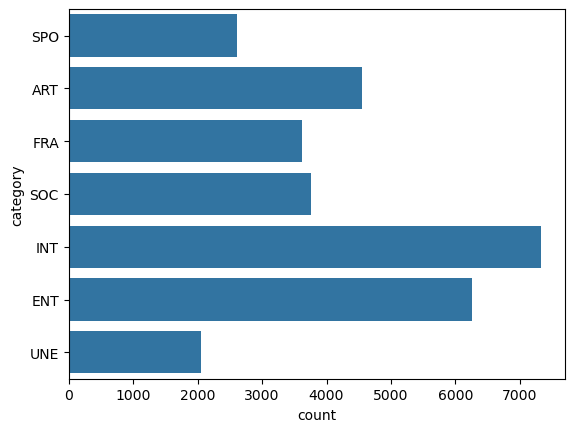

In [3]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
sns.countplot(data=df, y='category')

In [4]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)

print("Example of articles :")
pd.DataFrame.sample(df, n=4)

Example of articles :


text  \
1818                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      la city a perdu près de 20 000 emplois directs en 2002 trois salariés licenciés évoquent leur départ un associé d'une banque d'affaires âgé de 50 ans l'associé principal m'a déclaré nous voulons racheter tes titres. en clair tu es viré il fallait coûte que coûte réduire la masse salariale en sabrant dans la hiérarchie mon avocat a été chargé des négociations sur le montant des compensations mon ancien employeur n'a placé aucune interdiction professionnelle mais en échange a exigé que je signe un engagement de ne pas parler à la presse j'ai pu conserver mon abonnement au club de gym et la mercedes de fonction m'a été cédée à des conditions avantageuses ... j'ai choisi ensuite de me mettre à mon propre compte je travaille trois jours par semaine comme consultant pour une petite boîte de private banking basée à genève un trader âgé de 33 ans du jour au lendemain la banque américaine pour laquelle je travaillais a licencié toute l'équipe de vente d'actions allemandes comme c'est l'usage j'ai dû remettre mon pass et j'ai été escorté à la porte par deux vigiles mes effets personnels ont été délivrés le lendemain par taxi les conditions de mon départ ont été standards un mois de salaire par année d'ancienneté plus un mois pour licenciement express après plusieurs mois de farniente je suis parti à la recherche d'un autre emploi de trader dans la city je n'ai rien trouvé malgré les efforts des chasseurs de têtes et l'activation de mes réseaux dans les salles de négoce une technicienne informatique âgée de 27 ans le ch

Category: ENT


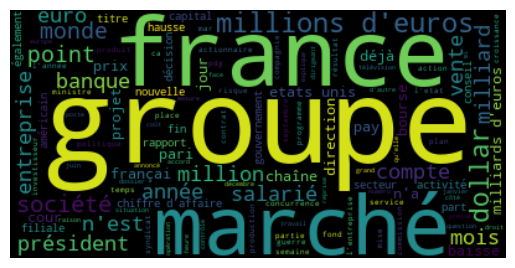

Category: INT


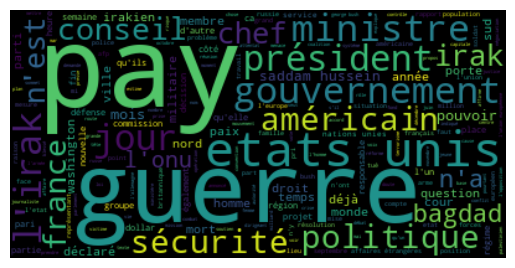

Category: ART


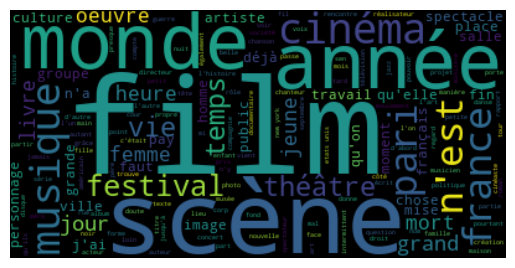

Category: SOC


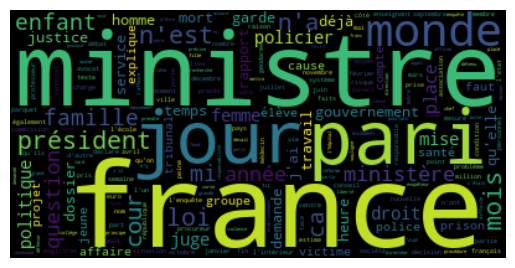

Category: FRA


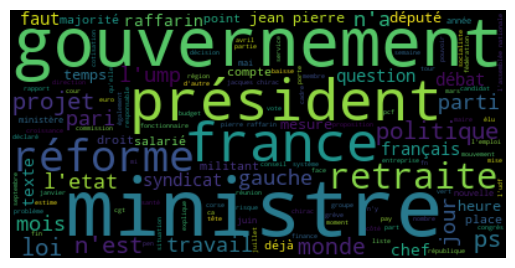

In [5]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
    text = df[df.category == cat].iloc[:,0].str.cat(sep=' ')
    wordcloud = WordCloud(stopwords = STOPWORDS).generate(text)
    print(f"Category: {cat}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [6]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size

df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2)
df_dev, df_test = train_test_split(df_test, train_size=0.5, test_size=0.5)

X_train = df_train.iloc[:,0]
y_train = df_train.iloc[:,1]

X_dev = df_dev.iloc[:,0]
y_dev = df_dev.iloc[:,1]

X_test = df_test.iloc[:,0]
y_test = df_test.iloc[:,1]

print(f"Size of the train set: {X_train.shape[0]}.")
print(f"Size of the dev set: {X_dev.shape[0]}.")
print(f"Size of the test set: {X_test.shape[0]}.")

Size of the train set: 24132.
Size of the dev set: 3016.
Size of the test set: 3017.


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# create the vectorizer object
vectorizer = CountVectorizer(max_features=1000)

# fit on train data
vectorizer.fit(X_train)

# apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

In [8]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier

# create the MultinomialNB
clf = MultinomialNB()

# Train 
clf.fit(X_train_counts, y_train)

# Evaluate 
print("Accuracy on the train set:", clf.score(X_train_counts, y_train))
print("Accuracy on the dev set:", clf.score(X_dev_counts, y_dev))
print("Accuracy on the test set:", clf.score(X_test_counts, y_test))

Accuracy on the train set: 0.7268771755345599
Accuracy on the dev set: 0.7191644562334217
Accuracy on the test set: 0.7288697381504806


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

# Create a TF-IDF representation with l2 norm
tf_transformer = TfidfTransformer(norm='l2').fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

# Train a MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tf, y_train)

# Evaluate 
print("Accuracy on the train set:", clf.score(X_train_tf, y_train))
print("Accuracy on the dev set:", clf.score(X_dev_tf, y_dev))
print("Accuracy on the test set:", clf.score(X_test_tf, y_test))

Accuracy on the train set: 0.7444886457815348
Accuracy on the dev set: 0.735079575596817
Accuracy on the test set: 0.7444481272787538


The test error rate is 25%.

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_test = clf.predict(X_test_tf)
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

         ART       0.78      0.87      0.82       462
         ENT       0.74      0.85      0.79       610
         FRA       0.63      0.68      0.65       344
         INT       0.76      0.86      0.81       756
         SOC       0.68      0.64      0.66       390
         SPO       0.91      0.74      0.82       264
         UNE       0.25      0.01      0.01       191

    accuracy                           0.74      3017
   macro avg       0.68      0.66      0.65      3017
weighted avg       0.72      0.74      0.72      3017



Arts ('ART'), international ('INT') and sports ('SPO') have the best scores. International is the class with the most observations so it makes sense that the classifier is more accurate. Sports have less observations but it could be link to international vocabulary. On the contrary, front page articles ('UNE') have very low scores, and also few observations.

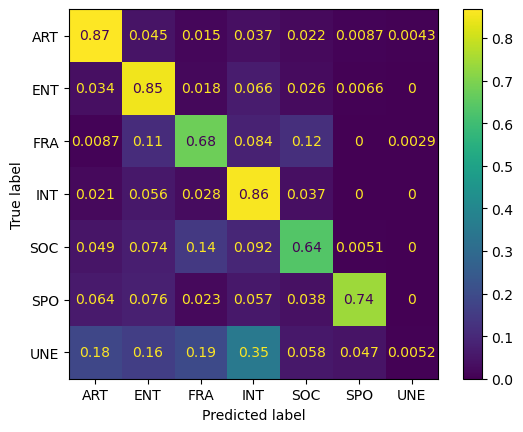

In [25]:
# confusion matrix normalized by lines
cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot()
plt.show()

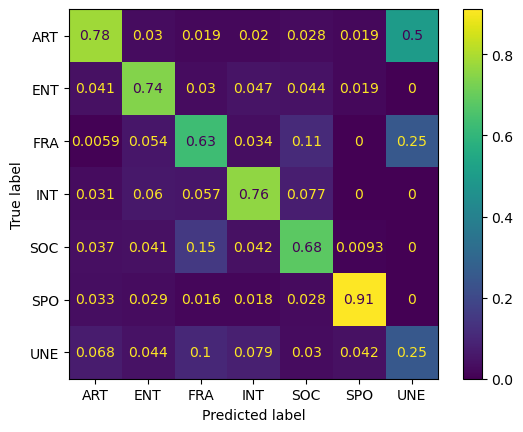

In [26]:
# confusion matrix normalized by column
cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_, normalize='pred')
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Front page articles ('UNE') is the more confused class (only 0.5% of observations are correctly classified), which makes sense since it has few observations (which are also probably shorter in terms of number of words). The most frequent predicted label for front page articles is international (35% of observations). A lot of front page articles are also classified as arts, entreprise and France.
France ('FRA') and society ('SOC') are also rather confused, with only 68% and 64% (resp.) of observations correctly classified. 12% of France articles are classified as society articles, and 11% as entreprises. Inversely, 14% of society articles are classified as France. This could be that France and society articles tend to adress the same subjects and use the same words.

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

Size of the train set: 22488.
Size of the dev set: 2811.
Size of the test set: 2811.


/tmp/ipykernel_921/1760837603.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_update['category'] = df_update['category'].replace({'SOC' : 'SOC_FRA', 'FRA' : 'SOC_FRA'})


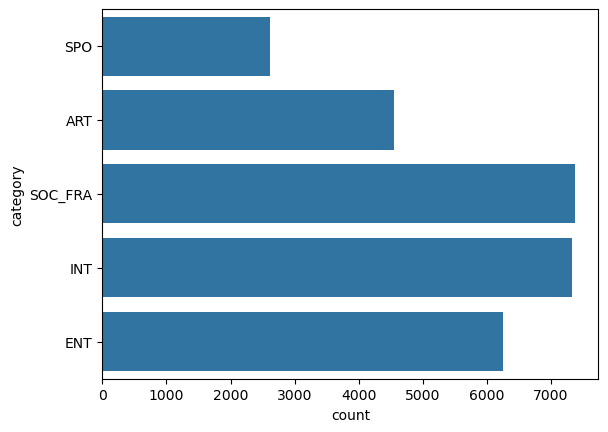

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Filter out the UNE class
df_update = df[df.category != 'UNE']

# Merge 'FRA' and 'SOC'
df_update['category'] = df_update['category'].replace({'SOC' : 'SOC_FRA', 'FRA' : 'SOC_FRA'})

# Plot the statistics of classes
sns.countplot(data=df_update, y='category')

# Make the splits and print the sizes for checking
df_train, df_test = train_test_split(df_update, train_size=0.8, test_size=0.2)
df_dev, df_test = train_test_split(df_test, train_size=0.5, test_size=0.5)

X_train = df_train.iloc[:,0]
y_train = df_train.iloc[:,1]

X_dev = df_dev.iloc[:,0]
y_dev = df_dev.iloc[:,1]

X_test = df_test.iloc[:,0]
y_test = df_test.iloc[:,1]

print(f"Size of the train set: {X_train.shape[0]}.")
print(f"Size of the dev set: {X_dev.shape[0]}.")
print(f"Size of the test set: {X_test.shape[0]}.")


Accuracy on the train set: 0.8396922803272857
Accuracy on the dev set: 0.8406261117040199
Accuracy on the test set: 0.8381358946993952


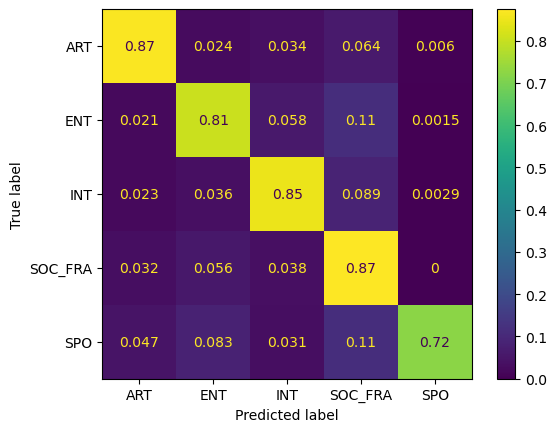

In [41]:
# Count document vectors
vectorizer = CountVectorizer(max_features=1000)

# fit on train data
vectorizer.fit(X_train)

# apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

# Apply TfidfVectorizer
tf_transformer = TfidfTransformer(norm='l2').fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

# Train a MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tf, y_train)

# Predictions
y_pred_test = clf.predict(X_test_tf)

# Print accuracy 
print("Accuracy on the train set:", clf.score(X_train_tf, y_train))
print("Accuracy on the dev set:", clf.score(X_dev_tf, y_dev))
print("Accuracy on the test set:", clf.score(X_test_tf, y_test))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Accuracy is much higher. 

## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.